## Simple forward pass

In this notebook you will do a simple forward pass for a neural network with and without hidden layers. You will use the sigmoid function to calculate the probability if a banknote is fake or not. We have to input features of the banknote:  
* x1: skewness of wavelet transformed image  
* x2: entropy of wavelet transformed image  

You will calculate the forward pass of the neural network without hidden layer by hand, with matrix multiplication and keras.  
For the neural network with one hidden layer (8 nodes) you will calculate the forward pass with matrix multiplication and keras.   
You will use random values for the weight initialization.  
In both neural networks you will predict the probability for a banknote to be fake and plot the decision boundary of the model. 

Try to understand the provided code. Run it, check the output, and play with it.



#### Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import optimizers

In [2]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

In [3]:
x1 = 1
x2 = 2.2

In [4]:
w1 = 0.3
w2 = 0.1
b  = 1 

### Forwad pass by hand

In [5]:
(x1*w1+x2*w2)+b ## output before the activation

1.52

In [6]:
sigmoid((x1*w1+x2*w2)+b) ## output after the sigmoid activation
                         ## probability for the banknote to be fake

0.8205384805926733

### Forwad pass with matrix multiplication

In [7]:
X=np.array([[x1,x2]])

In [8]:
W=np.array([[w1],[w2]])

In [9]:
print(X.shape)
print(W.shape)

(1, 2)
(2, 1)


In [10]:
np.matmul(X,W)+b  ## output before the activation

array([[1.52]])

In [11]:
sigmoid(np.matmul(X,W)+b) ## output after the sigmoid activation
                          ## probability for the banknote to be fake

array([[0.82053848]])

### Forwad pass in keras

In [12]:
model = Sequential()                                        # starts the definition of the network
model.add(Dense(1, batch_input_shape=(None, 2),             # adds a new layer to the network with a single neuron  
                activation='sigmoid'))                      # The input is a tensor of size (batch_size, 2), 
                                                            # since we don’t specify the Batch Size now, we use None as a placeholder
                                                            # chooses the activation function ‘sigmoid’
# Definition of the optimizer
sgd = optimizers.SGD(lr=0.15)                               # Defining the stochastic gradient descent optimizer

# compile model                                             # compile model, which ends the definition of the model 
model.compile(loss='binary_crossentropy',
              optimizer=sgd,                                # using the stochastic gradient descent optimizer
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.set_weights([W,np.array([b])])                        ## set the weights of the model to w1 w2 and b

In [14]:
model.predict(X)

array([[0.8205385]], dtype=float32)

In [15]:
### funtion to plot the decision boundary

def plotModel(X, model, t):
    # define a grid for the 2D feature space
    # predict at each grid point the probability for class 1

    x1list = np.linspace(-10, 10, 12) # Define 100 points on the x-axis
    x2list = np.linspace(-10, 10, 12) # Define 100 points on the x-axis
    X1_grid, X2_grid = np.meshgrid(x1list, x2list)

    # model.predict for respective value x1 and x2 
    p = np.array([model.predict(np.reshape(np.array([l1,l2]),(1,2))) for l1,l2 in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
    print(p.shape)
    if len(p.shape) == 3 and p.shape[2]==2:
        p = p[:,:,1] # pick p for class 1 if there are more than 2 classes
    p = np.reshape(p,X1_grid.shape)

    # visualize the predicted probabilities in the 2D feature space
    # once without and once with the data points used for fitting
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,(1))
    cp = plt.contourf(X1_grid, X2_grid, p,cmap='RdBu')
    plt.colorbar(cp)
    plt.title(t)
    plt.xlabel('x1')
    plt.ylabel('x2')

(144, 1, 1)


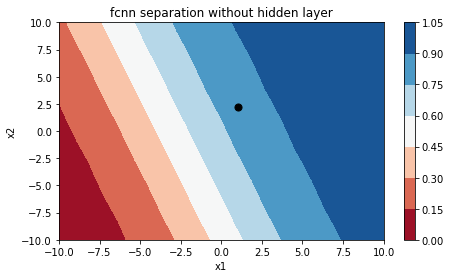

In [16]:
# Plotting the decision boundary

plotModel(X, model, 'fcnn separation without hidden layer') 
plt.scatter(X[0][0],X[0][1],c="black",s=50)
#plt.vlines(X[0][0],-10,10)
#plt.hlines(X[0][1],-10,10)

In [17]:
#### Exercise ####

### play around with the values for x1 and x2 and check if the position at the decision boundary
### matches the predicted probability

### How does the decision boundary look? 


### Forwad pass with hidden layer (matrix multiplication)

In [18]:
X=np.array([[x1,x2]])
np.random.seed(22)
W1=np.reshape((np.random.normal(0,1,16)),(2,8))
np.random.seed(22)
b1=np.reshape((np.random.normal(0,1,8)),(8,))
np.random.seed(22)
W2=np.reshape((np.random.normal(0,1,8)),(8,1))
np.random.seed(22)
b2=np.reshape((np.random.normal(0,1,1)),(1,))

In [19]:
print(X.shape)
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(1, 2)
(2, 8)
(8,)
(8, 1)
(1,)


In [20]:
hidden=sigmoid(np.matmul(X,W1)+b1)
hidden

array([[0.76752454, 0.01533699, 0.90265373, 0.27163597, 0.57707969,
        0.41351693, 0.37964327, 0.52893641]])

In [21]:
p_out=sigmoid(np.matmul(hidden,W2)+b2)
p_out

array([[0.44860787]])

### Forwad pass with hidden layer (keras)

In [22]:
model = Sequential()                                        
model.add(Dense(8, batch_input_shape=(None, 2),activation='sigmoid'))                      
model.add(Dense(1, activation='sigmoid'))                      

# Definition of the optimizer
sgd = optimizers.SGD(lr=0.15)                               # Defining the stochastic gradient descent optimizer

# compile model                                              
model.compile(loss='binary_crossentropy',
              optimizer=sgd,                                
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.set_weights([W1,b1,W2,b2]) ## set the weights of the model to W1, b1, W2 and b2

In [24]:
model.predict(X)

array([[0.4486078]], dtype=float32)

(144, 1, 1)


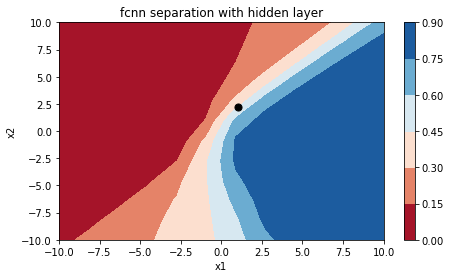

In [25]:
# Plotting the decision boundary

plotModel(X, model, 'fcnn separation with hidden layer') 
plt.scatter(X[0][0],X[0][1],c="black",s=50)
#plt.vlines(X[0][0],-10,10)
#plt.hlines(X[0][1],-10,10)

In [26]:
#### Exercise ####

### play around with the values for x1 and x2 and check if the position at the decision boundary
### matches the predicted probability

### How does the decision boundary look? 
